# Методы оптимизации

В качестве метода обновления параметров модели и минимизации функции потерь в курсе используется метод градиентного спуска. В данной лабораторной работе рассматриваются наиболее усовершенствованные методы оптимизации, которые позволяют увеличить скорость обучения и достичь наулучшего значения функции потерь. Хороший метод оптимизации позволит ускорит обучение с нескольких дней до нескольких часов.

Градиентный спуск осуществляет поиск минимума функции потерь $J$. Можно представить себе это следующим образом:
<img src="images/cost.jpg" style="width:650px;height:300px;">
<caption><center> <u> **Рисунок 1** </u>: **Минимизация потерь как поиск самой низкой точки в долине**<br> На каждом этапе обучения необходимо обновлять параметры, следуя определенному направлению, чтобы попытаться достичь минимально возможной точки. </center></caption>

**Определение**: $\frac{\partial J}{\partial a } = $ `da` для любой переменной `a`.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import math
import sklearn
import sklearn.datasets

from opt_utils import load_params_and_grads, initialize_parameters, forward_propagation, backward_propagation
from opt_utils import compute_cost, predict, predict_dec, plot_decision_boundary, load_dataset
from testCases import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # установить дефолтный размер графиков
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

## 1 - Градиентный спуск

Самый простой метод оптимизации в машинном обучении это градиентный спуск (gradient descent - GD), когда делаются градиентные шаги по отношению ко всем $m$-примерам на каждой итерации - также можно встретить название  Пакетный градиентный спуск (Batch Gradient Descent). 

**Упражнение**: Реализовать правило обновления градиентного спуска. Градиентный спуск для $l = 1, ..., L$: 
$$ W^{[l]} = W^{[l]} - \alpha \text{ } dW^{[l]} \tag{1}$$
$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} \tag{2}$$

где L - это количество слоев и $\alpha$ скорость градиентного спуска. Все параметры должны быть сохранены в словарь `parameters`. 
Обратите внимание, что при итерировании по `l` цикл `for` начинается с 0, в то время первые параметры начинаются с $W^{[1]}$ и $b^{[1]}$. Вам необходимо сдвинуть `l` в `l+1` при написании функции.

In [ ]:
# ОЦЕНИВАЕМОЕ: update_parameters_with_gd

def update_parameters_with_gd(parameters, grads, learning_rate):
    """
    Обновление параметров с использованием одного шага GD
    
    Arguments:
    parameters -- python словарь, содержащий параметры, которые должны быть обновлены:
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    grads -- python словарь, содержащий градиенты для обновления каждого параметра:
                    grads['dW' + str(l)] = dWl
                    grads['db' + str(l)] = dbl
    learning_rate -- скорость градиентного спуска.
    
    Returns:
    parameters -- python словарь, содержащий обновлённые параметры 
    """
    L = len(parameters) // 2 # количество слоёв в нейронной сети
    # Правило обновления каждого параметра
    for l in range(L):
        ### НАЧАЛО ВАШЕГО КОД ЗДЕСЬ ### (~2 строки кода)
        parameters["W" + str(l+1)] = None
        parameters["b" + str(l+1)] = None
        ### ОКОНЧАНИЕ ВАШЕГО КОД ЗДЕСЬ ###
    return parameters

In [ ]:
parameters, grads, learning_rate = update_parameters_with_gd_test_case()

parameters = update_parameters_with_gd(parameters, grads, learning_rate)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

**Ожидаемый результат**:

<table> 
    <tr>
    <td > **W1** </td> 
          <td > [[ 1.63535156 -0.62320365 -0.53718766]
 [-1.07799357  0.85639907 -2.29470142]] </td> 
    </tr> 
    <tr>
    <td > **b1** </td> 
           <td > [[ 1.74604067]
 [-0.75184921]] </td> 
    </tr> 
    <tr>
    <td > **W2** </td> 
           <td > [[ 0.32171798 -0.25467393  1.46902454]
 [-2.05617317 -0.31554548 -0.3756023 ]
 [ 1.1404819  -1.09976462 -0.1612551 ]] </td> 
    </tr> 
    <tr>
    <td > **b2** </td> 
           <td > [[-0.88020257]
 [ 0.02561572]
 [ 0.57539477]] </td> 
    </tr> 
</table>


Помимо пакетного градиентного спуска, часто в задачах используется Стохастический градиентный спуск (SGD), который эквивалентен  мини-пакетному (mini-batch) градиентному спуску, использующий на каждой итерации в качестве мини-пакета только 1 пример. Реализованное ранее правило обновления параметров не изменяется. Что изменится, так это то, что необходимо вычислять градиенты только на одном примере из обучающей выборки за один раз, а не на всем учебном наборе. Приведенные ниже примеры кода иллюстрируют разницу между стохастическим градиентным спуском и (пакетным) градиентным спуском.

- **(пакетный) Градиентный спуск**:

``` python
X = data_input
Y = labels
parameters = initialize_parameters(layers_dims)
for i in range(0, num_iterations):
    # Прямое распространение
    a, caches = forward_propagation(X, parameters)
    # Вычисление потерь
    cost = compute_cost(a, Y)
    # Обратное распростарнение
    grads = backward_propagation(a, caches, parameters)
    # Обновление параметров
    parameters = update_parameters(parameters, grads)
        
```

- **Стохастический градиентный спуск**:

```python
X = data_input
Y = labels
parameters = initialize_parameters(layers_dims)
for i in range(0, num_iterations):
    for j in range(0, m):
        # Прямое распространение
        a, caches = forward_propagation(X[:,j], parameters)
        # Вычисление потерь
        cost = compute_cost(a, Y[:,j])
        # Обратное распростарнение
        grads = backward_propagation(a, caches, parameters)
        # Обновление параметров
        parameters = update_parameters(parameters, grads)
```


В Стохастическом градиентном спуске используется 1 обучающий пример для обновления параметров. Использование SGD обусловлено скоростью вычислений при большом обучающем наборе. Но при этом во время обучения параметры будут "колебаться", а не сходиться плавно. Вот иллюстрация этого:

<img src="images/kiank_sgd.png" style="width:750px;height:250px;">
<caption><center> <u> <font color='purple'> **Рисунок 1** </u><font color='purple'>  : **SGD против GD**<br> "+" обозначает точку минимума. SGD приводит ко многим колебаниям, чтобы достичь сходимости. Но каждый шаг намного быстрее вычисляется для SGD, чем для GD, так как он использует только один обучающий пример. </center></caption>

**Обратите внимание** реализация SGD включает 3 три цикла:
1. Количество итераций обучения
2. Количество обучающих примеров - $m$
3. Количество слоев (обновление всех параметров, с $(W^{[1]},b^{[1]})$ до $(W^{[L]},b^{[L]})$)

На практике для получения результатов наиболее быстрым способом, обычно используют мини-пакетный градиентный спуск, который включает в себя количество примеров $mini_batch_size$, где значения $mini_batch_size$ лежат в интервале $1 < mini_batch_size < m$ для каждого шага.

<img src="images/kiank_minibatch.png" style="width:750px;height:250px;">
<caption><center> <u> <font color='purple'> **Рисунок 2** </u>: <font color='purple'>  **SGD против Мини-пакетный GD**<br> "+" обозначает точку минимума. Использование мини-пакетов в алгоритме часто приводит к более быстрой оптимизации.</center></caption>

<font color='blue'>
**Что необходимо помнить**:
- Разница между градиентным спуском, мини-пакетным градиентным спуском и стохастическим градиентным спуском заключается в количестве примеров, используемых для выполнения одного шага обновления параметров.
- Необходимо настраивать гиперпараметр - скорость обучения $\alpha$.
- При хорошо подобранном размере мини-пакета результат для обучения превосходит классический градиентный спуск, либо стохастический градиентный спуск (особенно когда обучающий набор включает множество обучающих примеров).

## 2 - Mини-пакетный градиентный спуск

В данной части Вы будете создавать мини-пакеты из обучающего набора (X, Y).

Два шага:
- **Перемешивание**: создание перемешанной выборки из обучающего набора (X, Y). Каждая колонка X и Y представляет один обучающий пример. Обратите внимание, что случайное перемешивание выполняется синхронно между X и Y. 

Таким образом, после перетасовки  $i^{th}$ столбец матрицы X является одним примером, соответствующим $i^{th}$ метке в Y. Шаг перетасовки гарантирует, что примеры будут случайным образом разбиты на различные мини-пакеты.

<img src="images/kiank_shuffle.png" style="width:550px;height:300px;">

- **Разделение**: разделение перемешанных (X, Y) на мини-пакеты размером mini_batch_size (в примере используется 64). Обратите внимание, что количество обучающих примеров не всегда делится на mini_batch_size. Последняя мини-партия может быть меньше. Если конечный мини-пакет меньше, чем полный mini_batch_size, он будет выглядеть следующим образом:

<img src="images/kiank_partition.png" style="width:550px;height:300px;">

**Упражнение**: Реализуйте `random_mini_batches`. Часть кода с шагом перетасовки уже реализовано. Ваша задача дописать шаг разделения,ниже написан код, который выбирает индексы для мини-пакетов $1^{й}$ и $2^{й}$: 
```python
first_mini_batch_X = shuffled_X[:, 0 : mini_batch_size]
second_mini_batch_X = shuffled_X[:, mini_batch_size : 2 * mini_batch_size]
...
```
Обратите внимание, что последний мини-пакет может оказаться меньше, чем `mini_batch_size=64`. Пусть $\lfloor s \rfloor$ обозначает $s$ округленное до ближайшего целого числа (`math.floor(s)` в Python). Если общее число примеров не кратно `mini_batch_size = 64` то будет $\lfloor \frac{m}{mini\_batch\_size}\rfloor$ мини-пакеты с полными 64 примерами, а число примеров в конечном мини-пакете будет  ($m-mini_\_batch_\_size \times \lfloor \frac{m}{mini\_batch\_size}\rfloor$).

In [ ]:
# ОЦЕНИВАЕМОЕ: random_mini_batches

def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
    """
    Создание списка со случайными мини-пакетами из (X, Y)
    
    Arguments:
    X -- входные данные, размер (input size, number of examples)
    Y -- вектор меток (1 for blue dot / 0 for red dot), размер (1, number of examples)
    mini_batch_size -- размер мини-пакета, integer
    
    Returns:
    mini_batches -- список мини-пакетов (mini_batch_X, mini_batch_Y)
    """
    
    np.random.seed(seed)
    m = X.shape[1]                  # количество обучающих примеров
    mini_batches = []
        
    # Step 1: Перемешиваем (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((1,m))

    # Step 2: Разделяем (shuffled_X, shuffled_Y). За исключением конечного случая.
    num_complete_minibatches = math.floor(m/mini_batch_size) # количество мини-пакетов с размером mini_batch_size в разделении
    for k in range(0, num_complete_minibatches):
        ### НАЧАЛО ВАШЕГО КОД ЗДЕСЬ ### (~2 строки кода)
        mini_batch_X = None
        mini_batch_Y = None
        ### ОКОНЧАНИЕ ВАШЕГО КОД ЗДЕСЬ ###
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Обработка конечного случая (mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        ### НАЧАЛО ВАШЕГО КОД ЗДЕСЬ ### (~2 строки кода)
        mini_batch_X = None
        mini_batch_Y = None
        ### ОКОНЧАНИЕ ВАШЕГО КОД ЗДЕСЬ ###
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

In [ ]:
X_assess, Y_assess, mini_batch_size = random_mini_batches_test_case()
mini_batches = random_mini_batches(X_assess, Y_assess, mini_batch_size)

print ("размер 1го mini_batch_X: " + str(mini_batches[0][0].shape))
print ("размер 2го mini_batch_X: " + str(mini_batches[1][0].shape))
print ("размер 3го mini_batch_X: " + str(mini_batches[2][0].shape))
print ("размер 1го mini_batch_Y: " + str(mini_batches[0][1].shape))
print ("размер 2го mini_batch_Y: " + str(mini_batches[1][1].shape)) 
print ("размер 3го mini_batch_Y: " + str(mini_batches[2][1].shape))
print ("Мини пакетная проверка: " + str(mini_batches[0][0][0][0:3]))

**Ожидаемый результат**:

<table style="width:50%"> 
    <tr>
    <td > **shape of the 1st mini_batch_X** </td> 
           <td > (12288, 64) </td> 
    </tr> 
    <tr>
    <td > **shape of the 2nd mini_batch_X** </td> 
           <td > (12288, 64) </td> 
    </tr> 
    <tr>
    <td > **shape of the 3rd mini_batch_X** </td> 
           <td > (12288, 20) </td> 
    </tr>
    <tr>
    <td > **shape of the 1st mini_batch_Y** </td> 
           <td > (1, 64) </td> 
    </tr> 
    <tr>
    <td > **shape of the 2nd mini_batch_Y** </td> 
           <td > (1, 64) </td> 
    </tr> 
    <tr>
    <td > **shape of the 3rd mini_batch_Y** </td> 
           <td > (1, 20) </td> 
    </tr> 
    <tr>
    <td > **Мини пакетная проверка** </td> 
           <td > [ 0.90085595 -0.7612069   0.2344157 ] </td> 
    </tr>
    
</table>

<font color='blue'>
**Что необходимо помнить**:
- Перемешивание и разделение - это два шага, необходимые для создания и использования мини-пакетов.
- Степени двух часто выбираются в качестве размера мини-пакетов, например, 16, 32, 64, 128.

## 3 - Momentum

Поскольку мини-пакетный градиентный спуск делает обновление параметров после просмотра только подмножества примеров, направление обновления имеет некоторую дисперсию, и поэтому путь, пройденный мини-пакетным градиентным спуском, будет "колебаться" в сторону точки минимума. Использование импульса (momentum) может уменьшить эти колебания.

Импульс учитывает прошлые градиенты, чтобы сгладить обновление. Мы сохраним "направление" предыдущих градиентов в переменной $v$. Формально это будет экспоненциально взвешенное среднее градиента на предыдущих шагах. Вы также можете думать о $v$ как о "скорости" шара, катящегося вниз по склону, наращивая скорость (и импульс) в соответствии с направлением градиента/наклона холма.

<img src="images/opt_momentum.png" style="width:400px;height:250px;">
<caption><center> <u><font color='purple'>**Рисунок 3**</u><font color='purple'>: 
Красные стрелки показывают направление, выбранное одним шагом мини-пакетного градиентного спуска с импульсом. Синие точки показывают направление градиента (относительно текущего мини-пакета) на каждом шаге. Вместо того чтобы просто следовать градиенту, мы позволяем градиенту влиять на $v$, а затем делаем шаг в направлении $v$.<br> <font color='black'> </center>


**Упражнение**: Инициализируйте скорость. Скрость $v$ -  python словарь который должен быть инциализирован в массив нулей. Его ключи такие же, как и в словаре "grads":
for $l =1,...,L$:
```python
v["dW" + str(l+1)] = ... #(numpy array of zeros с размером как parameters["W" + str(l+1)])
v["db" + str(l+1)] = ... #(numpy array of zeros с размером как parameters["b" + str(l+1)])
```
**Заметка** итератор по l начинается с 0 в цикле, в то время первый параметры начинаются с 1 - v["dW1"] и v["db1"]. Поэтому происходит сдвиг l в l+1 в цикле `for`.

In [ ]:
# ОЦЕНИВАЕМОЕ: initialize_velocity

def initialize_velocity(parameters):
    """
    Иницилизация скорости как python словаря с:
                - ключами: "dW1", "db1", ..., "dWL", "dbL" 
                - значениями: numpy массив нулей размером соответствующим размеру градиентов/параметров.
    Arguments:
    parameters -- python словарь, содержащий параметры
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    
    Returns:
    v -- python словарь, содержащий скорость
                    v['dW' + str(l)] = velocity of dWl
                    v['db' + str(l)] = velocity of dbl
    """
    
    L = len(parameters) // 2 # количество слоёв в нейронной сети
    v = {}
    
    # Инициализация скорости
    for l in range(L):
        ### НАЧАЛО ВАШЕГО КОД ЗДЕСЬ ### (~2 строки кода)
        v["dW" + str(l+1)] = None
        v["db" + str(l+1)] = None
        ### ОКОНЧАНИЕ ВАШЕГО КОД ЗДЕСЬ ###
        
    return v

In [ ]:
parameters = initialize_velocity_test_case()

v = initialize_velocity(parameters)
print("v[\"dW1\"] = " + str(v["dW1"]))
print("v[\"db1\"] = " + str(v["db1"]))
print("v[\"dW2\"] = " + str(v["dW2"]))
print("v[\"db2\"] = " + str(v["db2"]))

**Ожидаемый результат**:

<table style="width:40%"> 
    <tr>
    <td > **v["dW1"]** </td> 
           <td > [[ 0.  0.  0.]
 [ 0.  0.  0.]] </td> 
    </tr> 
    <tr>
    <td > **v["db1"]** </td> 
           <td > [[ 0.]
 [ 0.]] </td> 
    </tr> 
    <tr>
    <td > **v["dW2"]** </td> 
           <td > [[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]] </td> 
    </tr> 
    
    <tr>
    <td > **v["db2"]** </td> 
           <td > [[ 0.]
 [ 0.]
 [ 0.]] </td> 
    </tr> 
</table>


**Упражнение**:  Реализайте метод обновления параметров с использованием импульса (momentum). Правило momentum для $l = 1, ..., L$: 

$$ \begin{cases}
v_{dW^{[l]}} = \beta v_{dW^{[l]}} + (1 - \beta) dW^{[l]} \\
W^{[l]} = W^{[l]} - \alpha v_{dW^{[l]}}
\end{cases}\tag{3}$$

$$\begin{cases}
v_{db^{[l]}} = \beta v_{db^{[l]}} + (1 - \beta) db^{[l]} \\
b^{[l]} = b^{[l]} - \alpha v_{db^{[l]}} 
\end{cases}\tag{4}$$

где L количество слоев, $\beta$ импульс и $\alpha$ скорость обучения или длина градиентного шага. Все параметры должны быть сохранены в словарь `parameters`.

In [ ]:
# ОЦЕНИВАЕМОЕ: update_parameters_with_momentum

def update_parameters_with_momentum(parameters, grads, v, beta, learning_rate):
    """
    Обновление параметров с использованием Momentum
    
    Arguments:
    parameters -- python словарь, содержащий параметры:
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    grads -- python словарь, содержащий градиенты по параметрам:
                    grads['dW' + str(l)] = dWl
                    grads['db' + str(l)] = dbl
    v -- python словарь, содержащий скорости:
                    v['dW' + str(l)] = ...
                    v['db' + str(l)] = ...
    beta -- гиперпараметр импульса
    learning_rate -- скорость обучения
    
    Returns:
    parameters -- python словарь, содержащий обновленные параметры
    v -- словарь, содержащий обновленные скорости
    """

    L = len(parameters) // 2 # количество слоёв в нейронной сети
    
    # Momentum обновление каждого параметра
    for l in range(L):
        
        ### НАЧАЛО ВАШЕГО КОД ЗДЕСЬ ### (~4 строки кода)
        # вычисление скрости
        v["dW" + str(l+1)] = None
        v["db" + str(l+1)] = None
        # обновление параметров
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate*v["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate*v["db" + str(l+1)]
        ### ОКОНЧАНИЕ ВАШЕГО КОД ЗДЕСЬ ###
        
    return parameters, v

In [ ]:
parameters, grads, v = update_parameters_with_momentum_test_case()

parameters, v = update_parameters_with_momentum(parameters, grads, v, beta = 0.9, learning_rate = 0.01)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))
print("v[\"dW1\"] = " + str(v["dW1"]))
print("v[\"db1\"] = " + str(v["db1"]))
print("v[\"dW2\"] = " + str(v["dW2"]))
print("v[\"db2\"] = " + str(v["db2"]))

**Ожидаемый результат**:

<table style="width:90%"> 
    <tr>
    <td > **W1** </td> 
           <td > [[ 1.62544598 -0.61290114 -0.52907334]
 [-1.07347112  0.86450677 -2.30085497]] </td> 
    </tr> 
    <tr>
    <td > **b1** </td> 
           <td > [[ 1.74493465]
 [-0.76027113]] </td> 
    </tr> 
    <tr>
    <td > **W2** </td> 
           <td > [[ 0.31930698 -0.24990073  1.4627996 ]
 [-2.05974396 -0.32173003 -0.38320915]
 [ 1.13444069 -1.0998786  -0.1713109 ]] </td> 
    </tr> 
    <tr>
    <td > **b2** </td> 
           <td > [[-0.87809283]
 [ 0.04055394]
 [ 0.58207317]] </td> 
    </tr> 
    <tr>
    <td > **v["dW1"]** </td> 
           <td > [[-0.11006192  0.11447237  0.09015907]
 [ 0.05024943  0.09008559 -0.06837279]] </td> 
    </tr> 
    <tr>
    <td > **v["db1"]** </td> 
           <td > [[-0.01228902]
 [-0.09357694]] </td> 
    </tr> 
    <tr>
    <td > **v["dW2"]** </td> 
           <td > [[-0.02678881  0.05303555 -0.06916608]
 [-0.03967535 -0.06871727 -0.08452056]
 [-0.06712461 -0.00126646 -0.11173103]] </td> 
    </tr> 
    <tr>
    <td > **v["db2"]** </td> 
           <td > [[ 0.02344157]
 [ 0.16598022]
 [ 0.07420442]]</td> 
    </tr> 
</table>



**Обратите внимание**:
- Скорость инициализируется нулями. Таким образом, алгоритм займет несколько итераций, чтобы "нарастить" скорость и начать делать большие шаги.
- Если $\beta = 0$, то это просто становится стандартным градиентным спуском без импульса (momentum). 

**Как выбрать $\beta$?**

- Чем больше импульс $\beta$, тем плавнее идёт процесс обновления параметров, потому что учитываются прошлые градиенты наиболее глубоко. Но если $\beta$ слишком велик, то это может сгладить процесс обновления параметров слишком много. 
- Наиболее часто выбирают значения $\beta$ в диапазоне от 0.8 до 0.999. 
- Настройка оптимального $\beta$ для вашей модели требует подбора нескольких значений, чтобы отследить с каким значением модель работает лучше всего с точки зрения уменьшения значения функции затрат $J$.

<font color='blue'>
**Что необходимо помнить**:
- Импульс учитывает прошлые градиенты, чтобы сгладить шаги градиентного спуска. Он может применяться с пакетным градиентным спуском, мини-пакетным градиентным спуском или стохастическим градиентным спуском.
- В алгоритме присутствуют гиперпараметры, которые требуют настроек: импульс $\beta$ и скорость обучения $\alpha$.

## 4 - Adam

Adam - один из наиболее эффективных алгоритмов оптимизации для обучения нейронных сетей. Он сочетает в себе идеи из RMSProp (описанные в лекции) и Momentum.

**Как работает Adam?**
1. Он вычисляет экспоненциально взвешенное среднее прошлых градиентов и сохраняет его в переменных $v$ (до коррекции смещения (bias)) и $v^{corrected}$ (с коррекцией смещения (bias)). 
2. Он вычисляет экспоненциально взвешенное среднее квадратов прошлых градиентов и сохраняет его в переменных $s$ (до коррекции смещения (bias)) и $s^{corrected}$ (с коррекцией смещения (bias)). 
3. Он обновляет параметры в направлении, основанном на объединении информации из "1" и "2".

Правило обновления для $l = 1, ..., L$: 

$$\begin{cases}
v_{dW^{[l]}} = \beta_1 v_{dW^{[l]}} + (1 - \beta_1) \frac{\partial \mathcal{J} }{ \partial W^{[l]} } \\
v^{corrected}_{dW^{[l]}} = \frac{v_{dW^{[l]}}}{1 - (\beta_1)^t} \\
s_{dW^{[l]}} = \beta_2 s_{dW^{[l]}} + (1 - \beta_2) (\frac{\partial \mathcal{J} }{\partial W^{[l]} })^2 \\
s^{corrected}_{dW^{[l]}} = \frac{s_{dW^{[l]}}}{1 - (\beta_1)^t} \\
W^{[l]} = W^{[l]} - \alpha \frac{v^{corrected}_{dW^{[l]}}}{\sqrt{s^{corrected}_{dW^{[l]}}} + \varepsilon}
\end{cases}$$
где:
- t подсчитывает количество шагов, сделанных алгоритмом
- L количество слоёв
- $\beta_1$ и $\beta_2$ являются гиперпараметрами, управляющими двумя экспоненциально взвешенными средними
- $\alpha$ скорость градиентного спуска
- $\varepsilon$ - это очень маленькое число, для исключения случая деления на ноль

**Упражнение**: Инициализируйте переменные алгоритма Adam $v, s$ которые отслеживают прошлую информацию.

**Инструкция**: Переменные $v, s$ - это словари python, которые необходимо инициализировать массивами нулей. Ключами является тоже самое что и в словаре `grads`:
for $l = 1, ..., L$:
```python
v["dW" + str(l+1)] = ... #(numpy array of zeros таким же размером как parameters["W" + str(l+1)])
v["db" + str(l+1)] = ... #(numpy array of таким же размером как parameters["b" + str(l+1)])
s["dW" + str(l+1)] = ... #(numpy array of таким же размером как as parameters["W" + str(l+1)])
s["db" + str(l+1)] = ... #(numpy array of таким же размером как as parameters["b" + str(l+1)])

```

In [ ]:
# ОЦЕНИВАЕМОЕ: initialize_adam

def initialize_adam(parameters) :
    """
    Инициализация v и s как для python словаря:
                - ключи: "dW1", "db1", ..., "dWL", "dbL" 
                - значения: numpy arrays of zeros размером соответствующий градиентам/параметрам.
    
    Arguments:
    parameters -- python словарь, содержащий параметры:
                    parameters["W" + str(l)] = Wl
                    parameters["b" + str(l)] = bl
    
    Returns: 
    v -- словарь python, который будет содержать экспоненциально взвешенное среднее градиента
                    v["dW" + str(l)] = ...
                    v["db" + str(l)] = ...
    s -- словарь python, который будет содержать экспоненциально взвешенное среднее квадратичного градиента.
                    s["dW" + str(l)] = ...
                    s["db" + str(l)] = ...

    """
    
    L = len(parameters) // 2
    v = {}
    s = {}
    
    for l in range(L):
    ### НАЧАЛО ВАШЕГО КОД ЗДЕСЬ ### (~ 4 строки кода)
        v["dW" + str(l+1)] = None
        v["db" + str(l+1)] = None
        s["dW" + str(l+1)] = None
        s["db" + str(l+1)] = None
    ### ОКОНЧАНИЕ ВАШЕГО КОД ЗДЕСЬ ###
    
    return v, s

In [ ]:
parameters = initialize_adam_test_case()

v, s = initialize_adam(parameters)
print("v[\"dW1\"] = " + str(v["dW1"]))
print("v[\"db1\"] = " + str(v["db1"]))
print("v[\"dW2\"] = " + str(v["dW2"]))
print("v[\"db2\"] = " + str(v["db2"]))
print("s[\"dW1\"] = " + str(s["dW1"]))
print("s[\"db1\"] = " + str(s["db1"]))
print("s[\"dW2\"] = " + str(s["dW2"]))
print("s[\"db2\"] = " + str(s["db2"]))


**Ожидаемый результат**:

<table style="width:40%"> 
    <tr>
    <td > **v["dW1"]** </td> 
           <td > [[ 0.  0.  0.]
 [ 0.  0.  0.]] </td> 
    </tr> 
    <tr>
    <td > **v["db1"]** </td> 
           <td > [[ 0.]
 [ 0.]] </td> 
    </tr> 
    <tr>
    <td > **v["dW2"]** </td> 
           <td > [[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]] </td> 
    </tr>  
    <tr>
    <td > **v["db2"]** </td> 
           <td > [[ 0.]
 [ 0.]
 [ 0.]] </td> 
    </tr> 
    <tr>
    <td > **s["dW1"]** </td> 
           <td > [[ 0.  0.  0.]
 [ 0.  0.  0.]] </td> 
    </tr> 
    <tr>
    <td > **s["db1"]** </td> 
           <td > [[ 0.]
 [ 0.]] </td> 
    </tr> 
    <tr>
    <td > **s["dW2"]** </td> 
           <td > [[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]] </td> 
    </tr> 
    <tr>
    <td > **s["db2"]** </td> 
           <td > [[ 0.]
 [ 0.]
 [ 0.]] </td> 
    </tr>

</table>


**Упражнение**:  Теперь необходимо реализовать обновление параметров с помощью Adam. Общее правило обновления параметров, для $l = 1, ..., L$: 

$$\begin{cases}
v_{W^{[l]}} = \beta_1 v_{W^{[l]}} + (1 - \beta_1) \frac{\partial J }{ \partial W^{[l]} } \\
v^{corrected}_{W^{[l]}} = \frac{v_{W^{[l]}}}{1 - (\beta_1)^t} \\
s_{W^{[l]}} = \beta_2 s_{W^{[l]}} + (1 - \beta_2) (\frac{\partial J }{\partial W^{[l]} })^2 \\
s^{corrected}_{W^{[l]}} = \frac{s_{W^{[l]}}}{1 - (\beta_2)^t} \\
W^{[l]} = W^{[l]} - \alpha \frac{v^{corrected}_{W^{[l]}}}{\sqrt{s^{corrected}_{W^{[l]}}}+\varepsilon}
\end{cases}$$


In [ ]:
# ОЦЕНИВАЕМОЕ: update_parameters_with_adam

def update_parameters_with_adam(parameters, grads, v, s, t, learning_rate = 0.01,
                                beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8):
    """
    Обновление параметров с использование алгоритма Adam
    
    Arguments:
    parameters -- python словарь, содержащий параметры:
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    grads -- python словарь, содержащий градиентны параметров:
                    grads['dW' + str(l)] = dWl
                    grads['db' + str(l)] = dbl
    v -- переменная Adam, скользящее среднее первого градиента, словарь python
    s -- переменная Adam, скользящее среднее квадратичного градиента, словарь python
    learning_rate -- скорость обучения
    beta1 -- экспоненциальный гиперпараметр распада для оценок первого момента
    beta2 -- экспоненциальный гиперпараметр распада для оценок второго момента
    epsilon -- гиперпараметр, предотвращающий деление на ноль в обновлениях Adam

    Returns:
    parameters -- python словарь, содержащий параметры: 
    v -- переменная Adam, скользящее среднее первого градиента, словарь python
    s -- переменная Adam, скользящее среднее квадратичного градиента, словарь python
    """
    L = len(parameters) // 2            
    v_corrected = {}                    
    s_corrected = {}            
    
    for l in range(L):
        # Скользящее среднее градиентов. Входы: "v, grads, beta1" Выход: "v".
        ### НАЧАЛО ВАШЕГО КОД ЗДЕСЬ ### (~2 строки кода)
        v["dW" + str(l+1)] = None
        v["db" + str(l+1)] = None
        ### ОКОНЧАНИЕ ВАШЕГО КОД ЗДЕСЬ ###

        # Вычислить смещение-скорректированная оценка первого момента. Входы: "v, beta1, t". Выход: "v_corrected".
        ### НАЧАЛО ВАШЕГО КОД ЗДЕСЬ ### (~2 строки кода)
        v_corrected["dW" + str(l+1)] = None
        v_corrected["db" + str(l+1)] = None
        ### ОКОНЧАНИЕ ВАШЕГО КОД ЗДЕСЬ ###

        # Скользящее среднее квадратов градиентов. Входы: "s, grads, beta2". Выход: "s".
        ### НАЧАЛО ВАШЕГО КОД ЗДЕСЬ ### (~2 строки кода)
        s["dW" + str(l+1)] = None
        s["db" + str(l+1)] = None
        ### ОКОНЧАНИЕ ВАШЕГО КОД ЗДЕСЬ ###

        # Вычислить смещение-скорректированная оценка второго момента. Входы: "s, beta2, t". Выход: "s_corrected".
        ### НАЧАЛО ВАШЕГО КОД ЗДЕСЬ ### (~2 строки кода)
        s_corrected["dW" + str(l+1)] = None
        s_corrected["db" + str(l+1)] = None
        ### ОКОНЧАНИЕ ВАШЕГО КОД ЗДЕСЬ ###

        # Обновление параметров. Входы: "parameters, learning_rate, v_corrected, s_corrected, epsilon". Выход: "parameters".
        ### НАЧАЛО ВАШЕГО КОД ЗДЕСЬ ### (~2 строки кода)
        parameters["W" + str(l+1)] = None
        parameters["b" + str(l+1)] = None
        ### ОКОНЧАНИЕ ВАШЕГО КОД ЗДЕСЬ ###

    return parameters, v, s

In [ ]:
parameters, grads, v, s = update_parameters_with_adam_test_case()
parameters, v, s  = update_parameters_with_adam(parameters, grads, v, s, t = 2)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))
print("v[\"dW1\"] = " + str(v["dW1"]))
print("v[\"db1\"] = " + str(v["db1"]))
print("v[\"dW2\"] = " + str(v["dW2"]))
print("v[\"db2\"] = " + str(v["db2"]))
print("s[\"dW1\"] = " + str(s["dW1"]))
print("s[\"db1\"] = " + str(s["db1"]))
print("s[\"dW2\"] = " + str(s["dW2"]))
print("s[\"db2\"] = " + str(s["db2"]))

**Ожидаемый результат**:

<table> 
    <tr>
    <td > **W1** </td> 
           <td > [[ 1.63178673 -0.61919778 -0.53561312]
 [-1.08040999  0.85796626 -2.29409733]] </td> 
    </tr> 
    <tr>
    <td > **b1** </td> 
           <td > [[ 1.75225313]
 [-0.75376553]] </td> 
    </tr> 
    <tr>
    <td > **W2** </td> 
           <td > [[ 0.32648046 -0.25681174  1.46954931]
 [-2.05269934 -0.31497584 -0.37661299]
 [ 1.14121081 -1.09245036 -0.16498684]] </td> 
    </tr> 
    <tr>
    <td > **b2** </td> 
           <td > [[-0.88529978]
 [ 0.03477238]
 [ 0.57537385]] </td> 
    </tr> 
    <tr>
    <td > **v["dW1"]** </td> 
           <td > [[-0.11006192  0.11447237  0.09015907]
 [ 0.05024943  0.09008559 -0.06837279]] </td> 
    </tr>
    <tr>
    <td > **v["db1"]** </td> 
           <td > [[-0.01228902]
 [-0.09357694]] </td> 
    </tr> 
    <tr>
    <td > **v["dW2"]** </td> 
           <td > [[-0.02678881  0.05303555 -0.06916608]
 [-0.03967535 -0.06871727 -0.08452056]
 [-0.06712461 -0.00126646 -0.11173103]] </td> 
    </tr> 
    <tr>
    <td > **v["db2"]** </td> 
           <td > [[ 0.02344157]
 [ 0.16598022]
 [ 0.07420442]] </td> 
    </tr> 
    <tr>
    <td > **s["dW1"]** </td> 
           <td > [[ 0.00121136  0.00131039  0.00081287]
 [ 0.0002525   0.00081154  0.00046748]] </td> 
    </tr>
    <tr>
    <td > **s["db1"]** </td> 
           <td > [[  1.51020075e-05]
 [  8.75664434e-04]] </td> 
    </tr>
    <tr>
    <td > **s["dW2"]** </td> 
           <td > [[  7.17640232e-05   2.81276921e-04   4.78394595e-04]
 [  1.57413361e-04   4.72206320e-04   7.14372576e-04]
 [  4.50571368e-04   1.60392066e-07   1.24838242e-03]] </td> 
    </tr> 
    <tr>
    <td > **s["db2"]** </td> 
           <td > [[  5.49507194e-05]
 [  2.75494327e-03]
 [  5.50629536e-04]] </td> 
    </tr>
</table>


Теперь у вас есть три работающих алгоритма оптимизации (мини-пакетный градиентный спуск, Momentum, Adam). Давайте реализуем модель с каждым из этих оптимизаторов и рассмотрим разницу.

## 5 - Модель с различными методами оптимизации

Lets use the following "moons" dataset to test the different optimization methods. (The dataset is named "moons" because the data from each of the two classes looks a bit like a crescent-shaped moon.) 

Используется следующий набор данных "moons" для тестирования различных методов оптимизации. (Набор данных называется "moons", потому что данные из каждого класса немного похожи на полумесяц луны.

In [ ]:
train_X, train_Y = load_dataset()

Мы уже реализовали 3-х слойную нейронную сеть. Вы будете тренировать его с помощью:
- Мини-пакетным **Градиентным спуском**:
    - `update_parameters_with_gd()`
- Мини-пакетным **Momentum**:
    - `initialize_velocity()` и `update_parameters_with_momentum()`
- Мини-пакетным **Adam**:
    - `initialize_adam()` и `update_parameters_with_adam()`

In [ ]:
def model(X, Y, layers_dims, optimizer, learning_rate = 0.0007, mini_batch_size = 64, beta = 0.9,
          beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8, num_epochs = 10000, print_cost = True):
    """
    3-х слойная нейросетевая модель, которая может быть запущена в различных режимах оптимизатора.
    
    Arguments:
    X -- матрица признаков (2, number of examples)
    Y -- вектор меток (1 for blue dot / 0 for red dot), размер (1, number of examples)
    layers_dims -- python список, содержащий размер каждого слоя
    learning_rate -- скорость градиентного спуска.
    mini_batch_size -- размер мини-пакета
    beta -- Momentum гиперпараметр
    beta1 -- экспоненциальный гиперпараметр распада для оценок прошлых градиентов  
    beta2 -- экспоненциальный гиперпараметр распада для оценок прошлых квадратов градиентов  
    epsilon -- гиперпараметр, предотвращающий деление на ноль в обновлениях Adam
    num_epochs -- количество эпох
    print_cost -- вывод результатов для каждой 1000 эпох

    Returns:
    parameters -- python словарь содеражщий обновленные параметры 
    """

    L = len(layers_dims)             # количество слоёв в нейронной сети
    costs = []                       # для отслеживания стоимости
    t = 0                            # инициализация счетчика, необходимого для обновления Adam
    seed = 10                        

    # Инициализация параметров
    parameters = initialize_parameters(layers_dims)

    # Инициализация оптимизатора
    if optimizer == "gd":
        pass
    elif optimizer == "momentum":
        v = initialize_velocity(parameters)
    elif optimizer == "adam":
        v, s = initialize_adam(parameters)
    
    # Оптимизация
    for i in range(num_epochs):        
        seed = seed + 1
        minibatches = random_mini_batches(X, Y, mini_batch_size, seed)

        for minibatch in minibatches:

            # Выбор мини-пакета
            (minibatch_X, minibatch_Y) = minibatch

            # Прямое распространение
            a3, caches = forward_propagation(minibatch_X, parameters)

            # Вычисление потерь
            cost = compute_cost(a3, minibatch_Y)

            # Обратное распространение
            grads = backward_propagation(minibatch_X, minibatch_Y, caches)

            # Обновление параметров
            if optimizer == "gd":
                parameters = update_parameters_with_gd(parameters, grads, learning_rate)
            elif optimizer == "momentum":
                parameters, v = update_parameters_with_momentum(parameters, grads, v, beta, learning_rate)
            elif optimizer == "adam":
                t = t + 1 # Adam счётчик
                parameters, v, s = update_parameters_with_adam(parameters, grads, v, s,
                                                               t, learning_rate, beta1, beta2,  epsilon)
        
        if print_cost and i % 1000 == 0:
            print ("Cost after epoch %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
                
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('epochs (per 100)')
    plt.title("Learning rate = " + str(learning_rate))
    plt.show()

    return parameters

### 5.1-Мини-пакетный градиентный спуск

Выполните следующий кусок кода, чтобы увидеть, как модель работает с мини-пакетным градиентным спуском.

Cost after epoch 0: 0.690736
Cost after epoch 1000: 0.685273
Cost after epoch 2000: 0.647072
Cost after epoch 3000: 0.619525
Cost after epoch 4000: 0.576584
Cost after epoch 5000: 0.607243
Cost after epoch 6000: 0.529403
Cost after epoch 7000: 0.460768
Cost after epoch 8000: 0.465586
Cost after epoch 9000: 0.464518


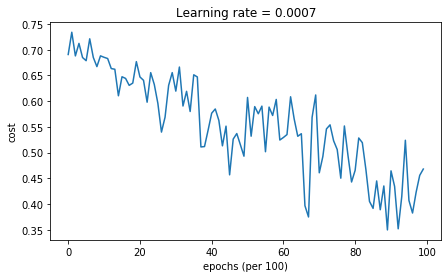

Accuracy: 0.7966666666666666


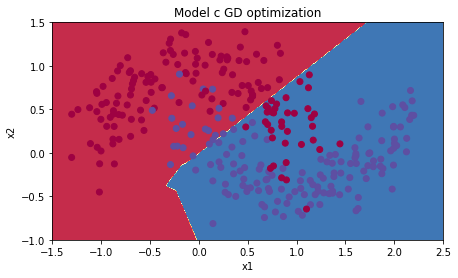

In [25]:
# обучение 3-слойной модели
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, optimizer = "gd")

# Predict
predictions = predict(train_X, train_Y, parameters)

plt.title("Model c GD optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y[0])

### 5.2 - Мини-пакетный градиентный спуск с Momentum

Выполните следующий блок кода, чтобы увидеть, как модель работает с Momentum. Поскольку этот пример относительно прост, выигрыш от использования Momentum невелик, но для более сложных задач выигрыш значительно больше.

Cost after epoch 0: 0.690741
Cost after epoch 1000: 0.685341
Cost after epoch 2000: 0.647145
Cost after epoch 3000: 0.619594
Cost after epoch 4000: 0.576665
Cost after epoch 5000: 0.607324
Cost after epoch 6000: 0.529476
Cost after epoch 7000: 0.460936
Cost after epoch 8000: 0.465780
Cost after epoch 9000: 0.464740


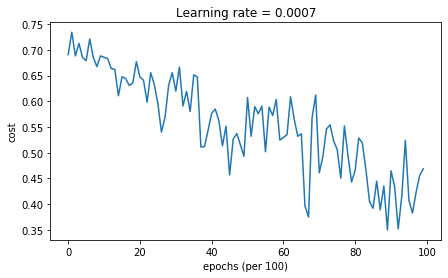

Accuracy: 0.7966666666666666


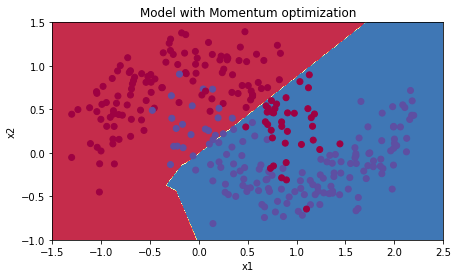

In [24]:
# обучение 3-слойной модели
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, beta = 0.9, optimizer = "momentum")

# Predict
predictions = predict(train_X, train_Y, parameters)

plt.title("Model c Momentum")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y[0])

### 5.3 - Мини-пакет с Adam
Выполните следующий код, чтобы увидеть, как модель работает с Adam.

Cost after epoch 0: 0.690537
Cost after epoch 1000: 0.396524
Cost after epoch 2000: 0.293472
Cost after epoch 3000: 0.149022
Cost after epoch 4000: 0.158572
Cost after epoch 5000: 0.121641
Cost after epoch 6000: 0.127852
Cost after epoch 7000: 0.040646
Cost after epoch 8000: 0.131920
Cost after epoch 9000: 0.212814


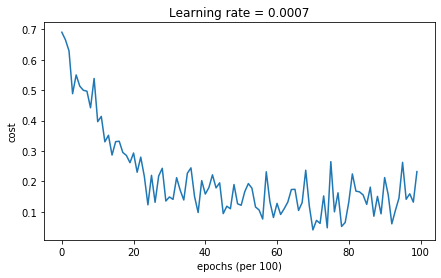

Accuracy: 0.9366666666666666


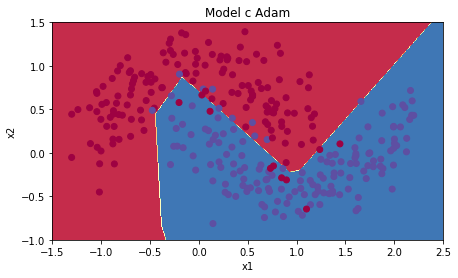

In [27]:
# обучение 3-слойной модели
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, optimizer = "adam")

# Predict
predictions = predict(train_X, train_Y, parameters)

plt.title("Model с Adam")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y[0])

### 5.4 - Вывод

<table> 
    <tr>
        <td>
        **Метод оптимизации**
        </td>
        <td>
        **Accuracy**
        </td>
        <td>
        **Потери**
        </td>
    </tr>
        <td>
        Gradient descent
        </td>
        <td>
        79.7%
        </td>
        <td>
        Колебаются
        </td>
    <tr>
        <td>
        Momentum
        </td>
        <td>
        79.7%
        </td>
        <td>
        Колебаются
        </td>
    </tr>
    <tr>
        <td>
        Adam
        </td>
        <td>
        94%
        </td>
        <td>
        Сглажены
        </td>
    </tr>
</table> 

Momentum обычно помогает в процессе обучении, но учитывая небольшую скорость обучения и упрощенный набор данных, его влияние почти незначительно. Кроме того, огромные колебания, которые вы видите в стоимости, происходят из-за того, что некоторые мини-пакеты сложнее, чем другие, для алгоритма оптимизации.

Адам, с другой стороны, явно превосходит мини-пакетный градиентный спуск и Momentum. Если вы запустите модель для нескольких эпох на этом простом наборе данных, все три метода приведут к очень хорошим результатам. Однако вы видели, что Адам сходится гораздо быстрее.

Некоторые преимущества Адама включают в себя:
- Относительно низкие требования к памяти (хотя и выше, чем градиентный спуск и градиентный спуск с Momentum) 
- Обычно хорошо работает даже при небольшой настройке гиперпараметров (кроме $\alpha$)

**Ссылки**:

- Статья Adam: https://arxiv.org/pdf/1412.6980.pdf